# Automatic Measuring Environment

In [1]:
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from random import Random

from schnapsen.bots import RandBot, RdeepBot
from schnapsen.game import Bot, SchnapsenGamePlayEngine

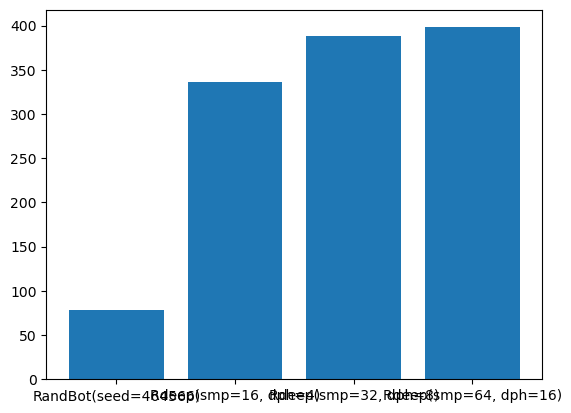

In [6]:
# measure which bot is the best one

# setup
engine = SchnapsenGamePlayEngine()
num_games = 100
wins: Dict[str, int] = {}

# players
bots = [
    RandBot(464566),
    RdeepBot(num_samples=16, depth=4, rand=Random(3547547535)),
    RdeepBot(num_samples=32, depth=8, rand=Random(3645645374)),
    RdeepBot(num_samples=64, depth=16, rand=Random(3645645374)),
]

# tournament
for bot1 in bots:
    for bot2 in bots:
        if bot1 == bot2:
            continue
        for n in range(num_games):
            if n % 2 == 0:
                bot1, bot2 = bot2, bot1
            winner_id, _, _ = engine.play_game(bot1, bot2, Random(n+1))
            if winner_id == bot1:
                wins[bot1] = wins.get(bot1, 0) + 1
            else:
                wins[bot2] = wins.get(bot2, 0) + 1

# plot the results
bot_names = [str(bot) for bot in bots]
bot_wins = [wins[bot] for bot in bots]
x = range(len(bot_names))
plt.bar(x, bot_wins)
plt.xticks(x, bot_names)
plt.show()
                



